In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
leads= pd.read_csv('Leads.csv')
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
leads.shape

(9240, 37)

In [6]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
sum(leads.duplicated(subset = 'Prospect ID')) ==0

True

In [9]:
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

In [10]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace= True)

In [11]:
leads= leads.replace('Select', np.nan)

In [12]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [13]:
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [15]:
col= leads.columns

for i in col:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 35):
        leads.drop(i, 1, inplace= True)
        

In [16]:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Re

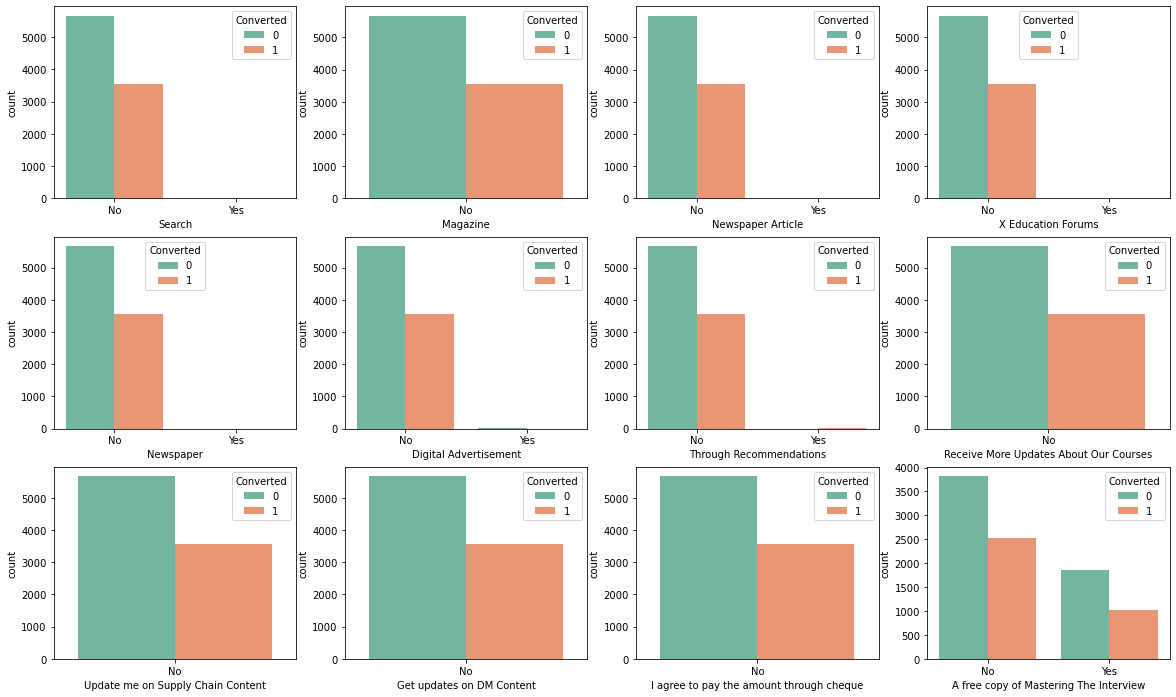

In [17]:
fig, axs = plt.subplots(3,4, figsize = (20,12))
sns.countplot(x = 'Search', hue = 'Converted', data= leads, ax= axs[0,0], palette = 'Set2')
sns.countplot(x = 'Magazine', hue = 'Converted', data= leads, ax= axs[0,1], palette = 'Set2')
sns.countplot(x = 'Newspaper Article', hue = 'Converted', data= leads, ax= axs[0,2], palette = 'Set2')
sns.countplot(x = 'X Education Forums', hue = 'Converted', data= leads, ax= axs[0,3], palette = 'Set2')
sns.countplot(x = 'Newspaper', hue = 'Converted', data= leads, ax= axs[1,0], palette = 'Set2')
sns.countplot(x = 'Digital Advertisement', hue = 'Converted', data= leads, ax= axs[1,1], palette = 'Set2')
sns.countplot(x = 'Through Recommendations', hue = 'Converted', data= leads, ax= axs[1,2], palette = 'Set2')
sns.countplot(x = 'Receive More Updates About Our Courses', hue = 'Converted', data= leads, ax= axs[1,3], palette = 'Set2')
sns.countplot(x = 'Update me on Supply Chain Content', hue = 'Converted', data= leads, ax= axs[2,0], palette = 'Set2')
sns.countplot(x = 'Get updates on DM Content', hue = 'Converted', data= leads, ax= axs[2,1], palette = 'Set2')
sns.countplot(x = 'I agree to pay the amount through cheque', hue = 'Converted', data= leads, ax= axs[2,2], palette = 'Set2')
sns.countplot(x = 'A free copy of Mastering The Interview', hue = 'Converted', data= leads, ax= axs[2,3], palette = 'Set2')

plt.show()

In [18]:
cols_to_drop= (['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

In [19]:
leads['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [20]:
leads['Lead Source']= leads['Lead Source'].replace(np.nan, 'Google')
leads['Lead Source']= leads['Lead Source'].replace('google','Google')

In [21]:
leads['Lead Source']= leads['Lead Source'].replace(['bing','Click2call','Press_Release','youtubechannel','welearnblog_Home','WeLearn','blog','Pay per Click Ads','testone','NC_EDM','Live Chat'], 'Others')

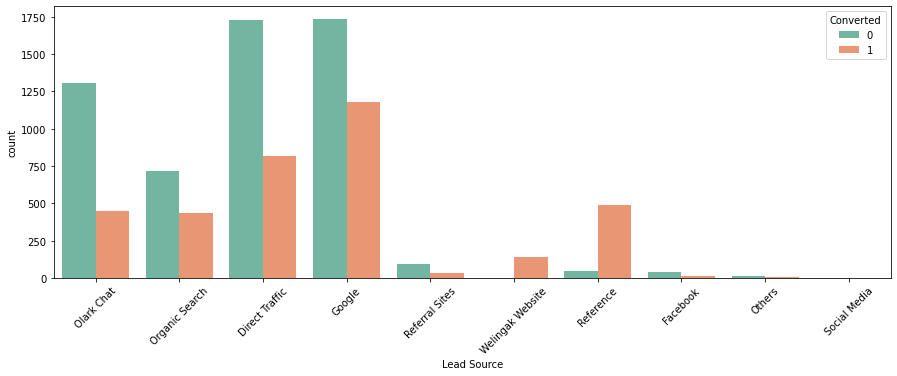

In [22]:
plt.figure(figsize= (15,5))
s1= sns.countplot(x= 'Lead Source', hue= 'Converted', data= leads, palette= 'Set2')
s1.set_xticklabels(s1.get_xticklabels(), rotation=45)
plt.show()


In [23]:
leads['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [24]:
leads['Country'] = leads['Country'].replace(np.nan, 'not provided')

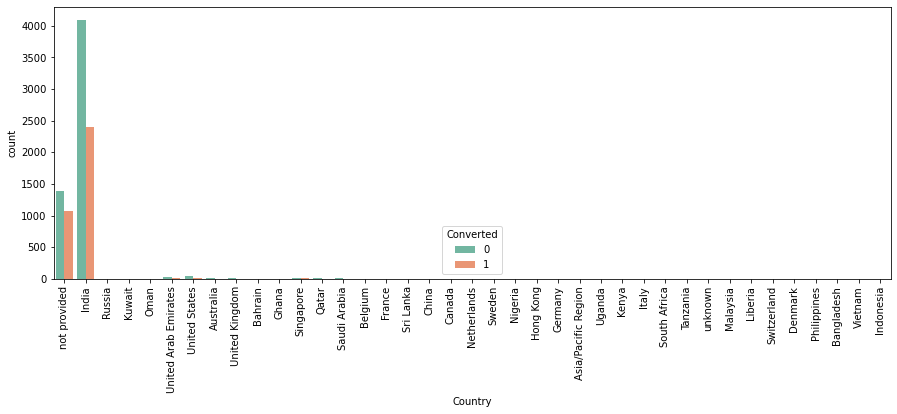

In [25]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted', data=leads, palette= 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [28]:
cols_to_drop.append('Country')
cols_to_drop


['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

In [29]:
leads['What is your current occupation']= leads['What is your current occupation'].replace(np.nan, 'Not provided')

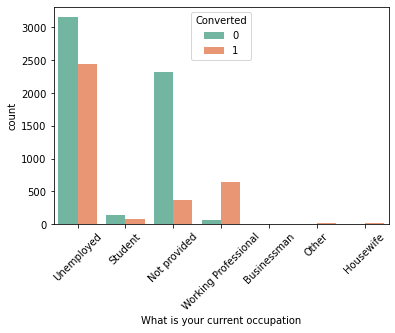

In [30]:
s1=sns.countplot(x= 'What is your current occupation', hue='Converted', data=leads, palette= 'Set2')
s1.set_xticklabels(s1.get_xticklabels(), rotation=45)
plt.show()

In [31]:
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [32]:
leads['What matters most to you in choosing a course']= leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Carrer Prospects')

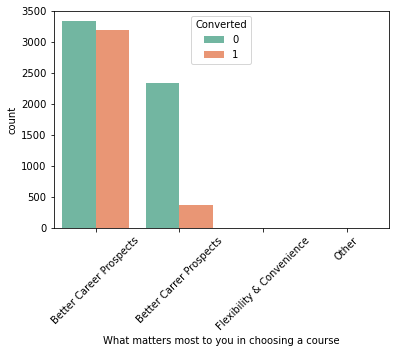

In [33]:
s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted', data=leads, palette= 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

In [34]:
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

In [35]:
leads['Last Activity'].value_counts(dropna= False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [37]:
leads['Last Activity']= leads['Last Activity'].replace(np.nan, 'Email Opened')

In [38]:
leads['Last Activity']= leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

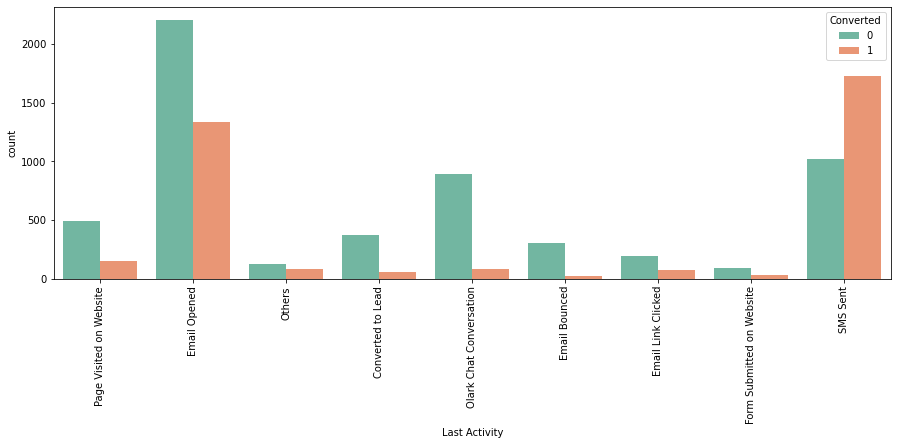

In [39]:
plt.figure(figsize=(15,5))
s1=sns.countplot(x='Last Activity', hue='Converted', data=leads, palette= 'Set2')
s1.set_xticklabels(s1.get_xticklabels(),rotation= 90)
plt.show()

In [40]:
cols_to_drop.append('Last Activity')
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [41]:
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

In [42]:
leads=leads.dropna()

In [43]:
leads.shape

(9103, 25)

In [45]:
round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

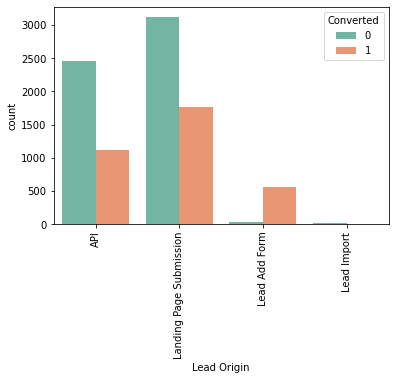

In [46]:
s1=sns.countplot(x= 'Lead Origin', hue= 'Converted',data= leads, palette= 'Set2')
s1.set_xticklabels(s1.get_xticklabels(), rotation= 90)
plt.show()

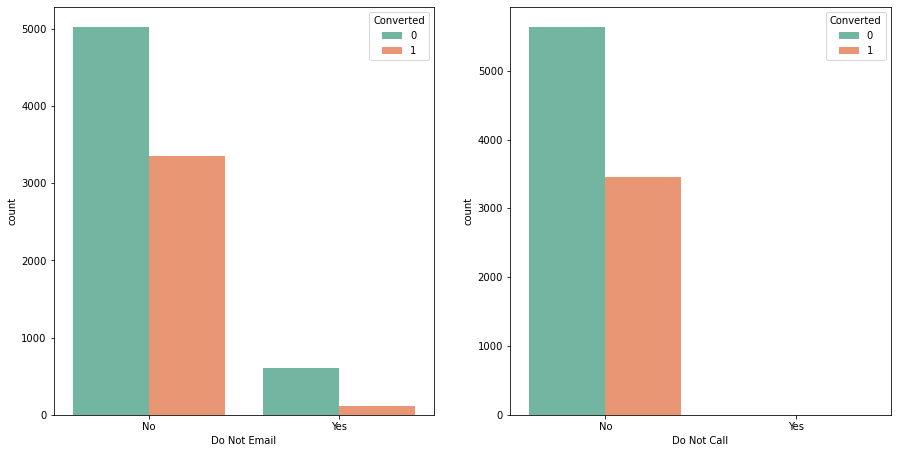

In [47]:
fig, axs= plt.subplots(1,2, figsize= (15,7.5))
sns.countplot(x= 'Do Not Email', hue= 'Converted', data= leads, ax= axs[0], palette= 'Set2')
sns.countplot(x= 'Do Not Call', hue= 'Converted', data= leads, ax= axs[1], palette= 'Set2')
plt.show()

In [48]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call']

In [49]:
leads['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [50]:
leads['Last Notable Activity']= leads['Last Notable Activity'].replace(['Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received'],'Others')

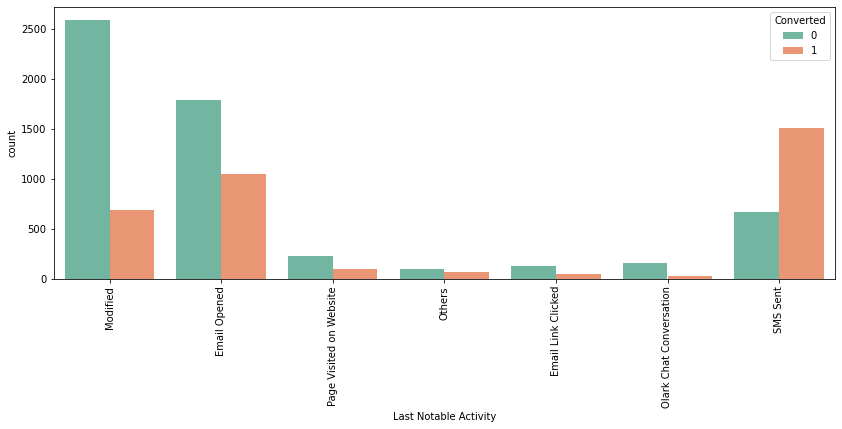

In [51]:
plt.figure(figsize= (14,5))
ax1=sns.countplot(x= 'Last Notable Activity', hue= 'Converted', data= leads, palette= 'Set2')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation= 90)
plt.show()

In [52]:
cols_to_drop.append('Last Notable Activity')
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Do Not Call',
 'Last Notable Activity']

In [53]:
leads_df= leads.drop(cols_to_drop, 1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Do Not Call                                    9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

In [54]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


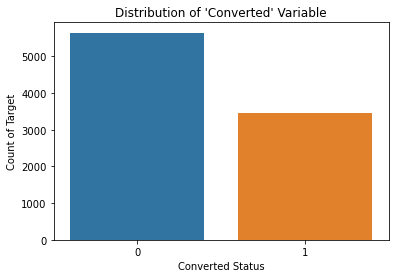

In [56]:
sns.countplot(leads_df.Converted)
plt.xlabel('Converted Status')
plt.ylabel('Count of Target')
plt.title("Distribution of 'Converted' Variable")
plt.show()

In [57]:
Converted= (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
Converted

38.02043282434362

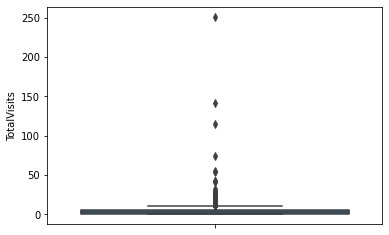

In [60]:
sns.boxplot(y=leads_df['TotalVisits'])
plt.show()

In [61]:
leads_df['TotalVisits'].describe(percentiles=[0.05,.25,.5,.75,.90,.95,.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

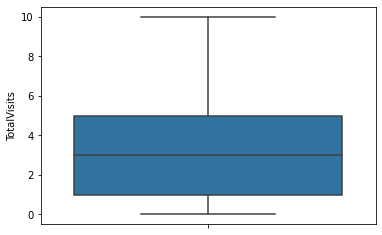

In [62]:
percentiles= leads_df['TotalVisits'].quantile([0.05, 0.95]).values
leads_df['TotalVisits'][leads_df['TotalVisits'] <= percentiles[0]]= percentiles[0]
leads_df['TotalVisits'][leads_df['TotalVisits'] >= percentiles[1]]= percentiles[1]

sns.boxplot(y= leads_df['TotalVisits'])
plt.show()

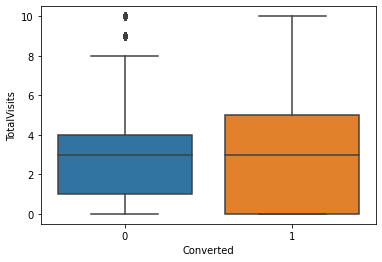

In [63]:
sns.boxplot(y = 'TotalVisits', x= 'Converted', data= leads_df)
plt.show()

In [64]:
leads_df['Total Time Spent on Website'].describe(percentiles= [0.05, .25, .5, .75, .90,.99])

count    9103.000000
mean      481.350104
std       545.066142
min         0.000000
5%          0.000000
25%         9.000000
50%       244.000000
75%       919.500000
90%      1372.000000
99%      1838.960000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

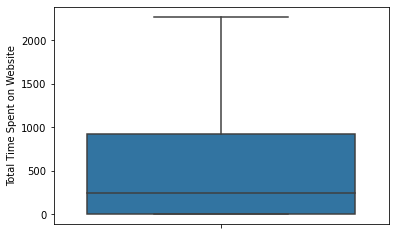

In [65]:
sns.boxplot(y = leads_df['Total Time Spent on Website'])
plt.show()

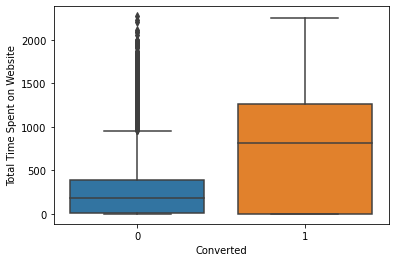

In [66]:
sns.boxplot(y= 'Total Time Spent on Website', x= 'Converted', data= leads_df)
plt.show()

In [67]:
leads_df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

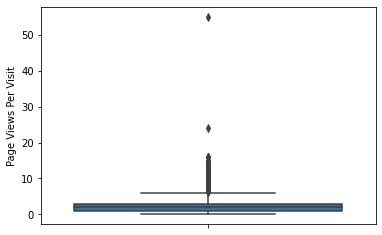

In [68]:
sns.boxplot(y = leads_df['Page Views Per Visit'])
plt.show()

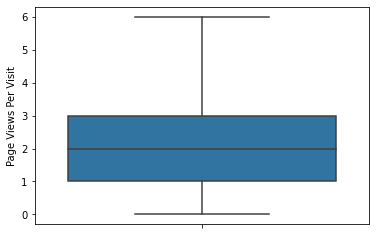

In [69]:
percentiles= leads_df['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] <= percentiles[0]]= percentiles[0]
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] >= percentiles[1]]= percentiles[1]
sns.boxplot(y =leads_df['Page Views Per Visit'])
plt.show()

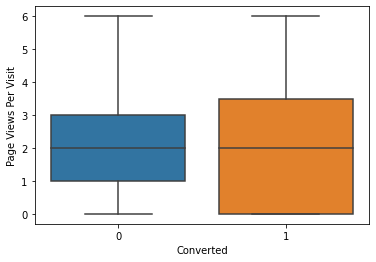

In [70]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data= leads_df)
plt.show()

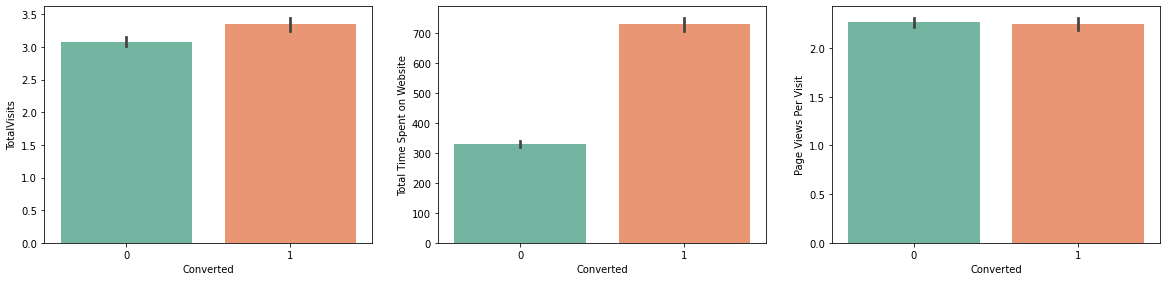

In [71]:
plt.figure(figsize=(20, 20))
plt.subplot(4,3,1)
sns.barplot(y= 'TotalVisits', x='Converted', palette= 'Set2', data=leads_df)
plt.subplot(4,3,2)
sns.barplot(y= 'Total Time Spent on Website', x='Converted', palette= 'Set2', data=leads_df)
plt.subplot(4,3,3)
sns.barplot(y= 'Page Views Per Visit', x='Converted', palette= 'Set2', data=leads_df)
plt.show()

In [74]:
varlist= ['Do Not Email']
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})
leads_df[varlist]= leads_df[varlist].apply(binary_map)

In [75]:
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Unemployed


In [76]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   int64  
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 640.1+ KB


In [77]:
cat_cols= leads_df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [78]:
dummy= pd.get_dummies(leads_df[['Lead Origin']], drop_first= True)
leads_df= pd.concat([leads_df, dummy], 1)

dummy= pd.get_dummies(leads_df['Lead Source'], prefix= 'Lead Source')
dummy= dummy.drop(['Lead Source_Others'], 1)
leads_df= pd.concat([leads_df, dummy], axis=1)

dummy= pd.get_dummies(leads_df['What is your current occupation'], prefix= 'What is your current occupation')
dummy= dummy.drop(['What is your current occupation_Not provided'], 1)
leads_df= pd.concat([leads_df, dummy], axis=1)


In [79]:
leads_df.drop(cat_cols, 1, inplace= True)

In [80]:
leads_df.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [81]:
from sklearn.model_selection import train_test_split

In [151]:
X= leads_df.drop('Converted', axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [83]:
y= leads_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [152]:
X_train, X_test, y_train, y_test= train_test_split(X,y, train_size= 0.7, test_size=0.3, random_state= 100)

In [153]:
from sklearn.preprocessing import StandardScaler

In [154]:
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols]= scaler.fit_transform(X_train[num_cols])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,-0.294015,-0.068258,1.476324,-0.423364,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5520,-0.294015,1.362470,-0.771066,2.083179,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1962,-0.294015,0.647106,-0.571257,0.133646,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1566,-0.294015,2.435517,1.393834,0.690655,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9170,-0.294015,-1.141305,-0.881052,-1.258878,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [88]:
(sum(y)/len(y.index))*100

38.02043282434362

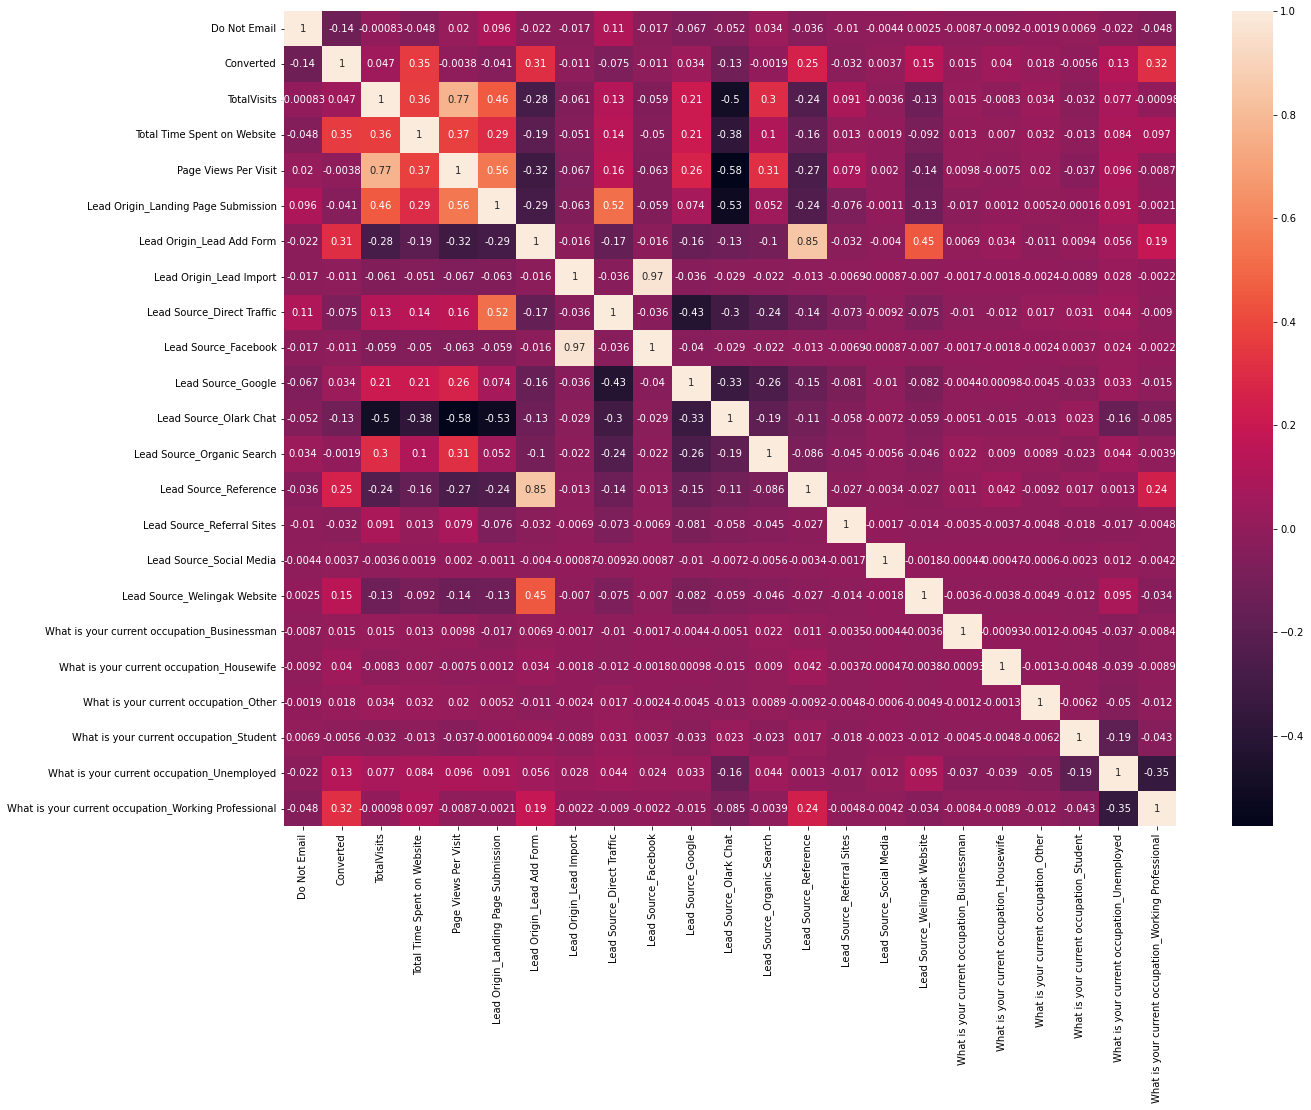

In [92]:
plt.figure(figsize= (20,15))
sns.heatmap(leads_df.corr(), annot= True)
plt.show()

In [155]:
import statsmodels.api as sm

In [156]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


In [165]:
lm= LogisticRegression()
rfe= RFE(lm, n_features_to_select= 15)
rfe= rfe.fit(X_train, y_train)
rfe.support_


array([ True, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True])

In [166]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', False, 8),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 4),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Social Media', False, 6),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [167]:
col= X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [168]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Social Media'],
      dtype='object')

In [169]:
X_train_sm= sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2861.9
Date:                Tue, 18 Apr 2023   Deviance:                       5723.8
Time:                        03:09:19   Pearson chi2:                 6.38e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3492
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0577      0.085    -24.265      0.000      -2.224      -1.891
Do Not Email                                            -0.3572      0.043     -8.336      0.000      -0.441      -0.273
Total Time Spent on Website                              1.1046      0.039     28.633      0.000       1.029       1.180
Lead Origin_Lead Add Form                                3.7140      0.222     16.744      0.000       3.279       4.149
Lead Origin_Lead Import                                  0.7644      1.565      0.488      0.625      -2.303       3.832
Lead Source_Direct Traffic                              -0.2445      0.079     -3.091      0.002      -0.400      -0.089
Lead Source_Facebook                                     0.1031      1.564      0.066      0.947      -2.963       3.169
Lead Source_Olark Chat                                   0.8357      0.100      8.360      0.000       0.640       1.032
Lead Source_Referral Sites                              -0.5552      0.329     -1.687      0.092      -1.200       0.090
Lead Source_Welingak Website                             1.9919      0.749      2.659      0.008       0.524       3.460
What is your current occupation_Businessman              1.4808      1.004      1.475      0.140      -0.486       3.448
What is your current occupation_Housewife               23.8534    1.6e+04      0.001      0.999   -3.14e+04    3.14e+04
What is your current occupation_Other                    1.3491      0.639      2.112      0.035       0.097       2.601
What is your current occupation_Student                  1.1841      0.225      5.258      0.000       0.743       1.625
What is your current occupation_Unemployed               1.3085      0.084     15.652      0.000       1.145       1.472
What is your current occupation_Working Professional     3.8033      0.189     20.082      0.000       3.432       4.174
========================================================================================================================
"""

In [170]:
col= col.drop('What is your current occupation_Housewife', 1)

In [171]:
X_train_sm= sm.add_constant(X_train[col])
logm2= sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2871.4
Date:                Tue, 18 Apr 2023   Deviance:                       5742.8
Time:                        03:11:51   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3472
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0294      0.084    -24.152      0.000      -2.194      -1.865
Do Not Email                                            -0.3585      0.043     -8.370      0.000      -0.442      -0.275
Total Time Spent on Website                              1.1043      0.039     28.676      0.000       1.029       1.180
Lead Origin_Lead Add Form                                3.7248      0.222     16.791      0.000       3.290       4.160
Lead Origin_Lead Import                                  0.7627      1.564      0.488      0.626      -2.304       3.829
Lead Source_Direct Traffic                              -0.2482      0.079     -3.143      0.002      -0.403      -0.093
Lead Source_Facebook                                     0.1005      1.564      0.064      0.949      -2.965       3.166
Lead Source_Olark Chat                                   0.8243      0.100      8.262      0.000       0.629       1.020
Lead Source_Referral Sites                              -0.5641      0.329     -1.716      0.086      -1.209       0.080
Lead Source_Welingak Website                             1.9794      0.749      2.642      0.008       0.511       3.448
What is your current occupation_Businessman              1.4546      1.004      1.449      0.147      -0.514       3.423
What is your current occupation_Other                    1.3240      0.639      2.073      0.038       0.072       2.576
What is your current occupation_Student                  1.1595      0.225      5.152      0.000       0.718       1.601
What is your current occupation_Unemployed               1.2828      0.083     15.468      0.000       1.120       1.445
What is your current occupation_Working Professional     3.7775      0.189     19.977      0.000       3.407       4.148
========================================================================================================================
"""

In [172]:
col= col.drop('Lead Source_Welingak Website', 1)

In [173]:
X_train_sm= sm.add_constant(X_train[col])
logm3= sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2877.1
Date:                Tue, 18 Apr 2023   Deviance:                       5754.2
Time:                        03:13:27   Pearson chi2:                 6.52e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3460
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0282      0.084    -24.147      0.000      -2.193      -1.864
Do Not Email                                            -0.3505      0.042     -8.321      0.000      -0.433      -0.268
Total Time Spent on Website                              1.1037      0.038     28.674      0.000       1.028       1.179
Lead Origin_Lead Add Form                                4.0784      0.212     19.196      0.000       3.662       4.495
Lead Origin_Lead Import                                  0.7567      1.566      0.483      0.629      -2.313       3.826
Lead Source_Direct Traffic                              -0.2488      0.079     -3.152      0.002      -0.404      -0.094
Lead Source_Facebook                                     0.1068      1.566      0.068      0.946      -2.962       3.175
Lead Source_Olark Chat                                   0.8241      0.100      8.262      0.000       0.629       1.020
Lead Source_Referral Sites                              -0.5638      0.329     -1.716      0.086      -1.208       0.080
What is your current occupation_Businessman              1.4295      1.017      1.405      0.160      -0.564       3.423
What is your current occupation_Other                    1.3230      0.639      2.071      0.038       0.071       2.575
What is your current occupation_Student                  1.1487      0.226      5.082      0.000       0.706       1.592
What is your current occupation_Unemployed               1.2839      0.083     15.482      0.000       1.121       1.446
What is your current occupation_Working Professional     3.7674      0.189     19.911      0.000       3.397       4.138
========================================================================================================================
"""

In [174]:
col= col.drop('What is your current occupation_Businessman', 1)

In [175]:
X_train_sm= sm.add_constant(X_train[col])
logm4= sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2878.0
Date:                Tue, 18 Apr 2023   Deviance:                       5756.1
Time:                        03:15:07   Pearson chi2:                 6.53e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3459
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0217      0.084    -24.140      0.000      -2.186      -1.858
Do Not Email                                            -0.3510      0.042     -8.331      0.000      -0.434      -0.268
Total Time Spent on Website                              1.1036      0.038     28.680      0.000       1.028       1.179
Lead Origin_Lead Add Form                                4.0850      0.212     19.224      0.000       3.669       4.502
Lead Origin_Lead Import                                  0.7565      1.566      0.483      0.629      -2.313       3.826
Lead Source_Direct Traffic                              -0.2486      0.079     -3.150      0.002      -0.403      -0.094
Lead Source_Facebook                                     0.1067      1.566      0.068      0.946      -2.962       3.175
Lead Source_Olark Chat                                   0.8231      0.100      8.253      0.000       0.628       1.019
Lead Source_Referral Sites                              -0.5654      0.329     -1.721      0.085      -1.209       0.079
What is your current occupation_Other                    1.3167      0.639      2.062      0.039       0.065       2.568
What is your current occupation_Student                  1.1422      0.226      5.054      0.000       0.699       1.585
What is your current occupation_Unemployed               1.2773      0.083     15.449      0.000       1.115       1.439
What is your current occupation_Working Professional     3.7608      0.189     19.888      0.000       3.390       4.131
========================================================================================================================
"""

In [176]:
col= col.drop('What is your current occupation_Other', 1)

In [177]:
X_train_sm= sm.add_constant(X_train[col])
logm5= sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res= logm5.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2880.1
Date:                Tue, 18 Apr 2023   Deviance:                       5760.2
Time:                        03:16:34   Pearson chi2:                 6.54e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3454
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0069      0.083    -24.123      0.000      -2.170      -1.844
Do Not Email                                            -0.3500      0.042     -8.319      0.000      -0.432      -0.268
Total Time Spent on Website                              1.1055      0.038     28.728      0.000       1.030       1.181
Lead Origin_Lead Add Form                                4.0871      0.212     19.236      0.000       3.671       4.504
Lead Origin_Lead Import                                  0.7584      1.566      0.484      0.628      -2.312       3.829
Lead Source_Direct Traffic                              -0.2449      0.079     -3.105      0.002      -0.400      -0.090
Lead Source_Facebook                                     0.1070      1.566      0.068      0.946      -2.962       3.176
Lead Source_Olark Chat                                   0.8217      0.100      8.242      0.000       0.626       1.017
Lead Source_Referral Sites                              -0.5686      0.328     -1.731      0.083      -1.212       0.075
What is your current occupation_Student                  1.1266      0.226      4.989      0.000       0.684       1.569
What is your current occupation_Unemployed               1.2615      0.082     15.365      0.000       1.101       1.422
What is your current occupation_Working Professional     3.7451      0.189     19.831      0.000       3.375       4.115
========================================================================================================================
"""

In [178]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif['Features']= X_train[col].columns
vif['VIF']= [variance_inflation_factor(X_train[col].values, i)for i in range(X_train[col].shape[1])]
vif['VIF']= round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending= False)
vif

,Features,VIF
3,Lead Origin_Lead Import,13.31
5,Lead Source_Facebook,13.31
9,What is your current occupation_Unemployed,1.61
4,Lead Source_Direct Traffic,1.38
6,Lead Source_Olark Chat,1.33
1,Total Time Spent on Website,1.29
2,Lead Origin_Lead Add Form,1.28
10,What is your current occupation_Working Profes...,1.16
8,What is your current occupation_Student,1.04
0,Do Not Email,1.02


In [179]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.728995
5520    0.149337
1962    0.218574
1566    0.967136
9170    0.311152
5097    0.113426
8954    0.254042
309     0.252843
5519    0.113426
1050    0.643439
dtype: float64

In [180]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.72899482, 0.14933675, 0.21857437, 0.96713642, 0.31115224,
       0.11342632, 0.25404196, 0.2528425 , 0.11342632, 0.64343902])

In [181]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID']= y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.728995,7962
1,0,0.149337,5520
2,0,0.218574,1962
3,1,0.967136,1566
4,0,0.311152,9170


In [182]:
y_train_pred_final['Predicted']= y_train_pred_final.Converted_prob.map(lambda x:1 if x> 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.728995,7962,1
1,0,0.149337,5520,0
2,0,0.218574,1962,0
3,1,0.967136,1566,1
4,0,0.311152,9170,0


In [184]:
confusion= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3550  403]
 [ 851 1568]]


In [185]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.803201506591337


In [186]:
TP= confusion[1,1]
TN= confusion[0,0]
FP= confusion[0,1]
FN= confusion[1,0]


In [187]:
TP/float(TP+FN)

0.6482017362546507

In [188]:
TN/ float(TN+FN)

0.8066348557146104

In [189]:
print(FP/float(TN+FP))

0.10194788768024285


In [190]:
print(TP/float(TP+FP))


0.7955352612886859


In [191]:
print(TN/ float(TN+FN))

0.8066348557146104


In [192]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds= metrics.roc_curve(actual, probs, drop_intermediate= False)
    auc_score= metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label= 'ROC curve (area=%0.2f)' %auc_score)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc= "lower right")
    
    plt.show()
    return None

In [193]:
fpr, tpr, thresholds= metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)

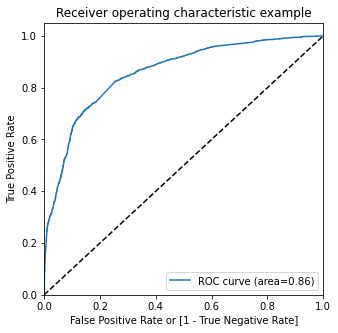

In [194]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [195]:
numbers= [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.728995,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.149337,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.218574,1962,0,1,1,1,0,0,0,0,0,0,0
3,1,0.967136,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.311152,9170,0,1,1,1,1,0,0,0,0,0,0


In [196]:
cutoff_df = pd.DataFrame(columns= ['prob','accuracy','sensi','speci'])

num= [0.0,0.1,0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1= sum(sum(cm1))
    accuracy= (cm1[0,0]+cm1[1,1])/total1
    
    speci= cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi= cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i]=[i, accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.515537  0.981811  0.230205
0.2   0.2  0.690992  0.906160  0.559322
0.3   0.3  0.771186  0.828442  0.736150
0.4   0.4  0.801789  0.700289  0.863901
0.5   0.5  0.803202  0.648202  0.898052
0.6   0.6  0.781858  0.563456  0.915507
0.7   0.7  0.759259  0.468375  0.937263
0.8   0.8  0.731952  0.348905  0.966355
0.9   0.9  0.709667  0.251757  0.989881


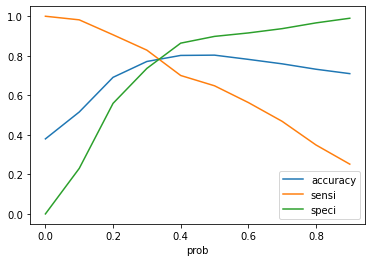

In [197]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [198]:
y_train_pred_final['final_Predicted']= y_train_pred_final.Converted_prob.map(lambda x : 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.728995,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.149337,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.218574,1962,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.967136,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.311152,9170,0,1,1,1,1,0,0,0,0,0,0,1


In [201]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted,Lead_Score
0,0,0.728995,7962,1,1,1,1,1,1,1,1,1,0,0,1,73
1,0,0.149337,5520,0,1,1,0,0,0,0,0,0,0,0,0,15
2,0,0.218574,1962,0,1,1,1,0,0,0,0,0,0,0,0,22
3,1,0.967136,1566,1,1,1,1,1,1,1,1,1,1,1,1,97
4,0,0.311152,9170,0,1,1,1,1,0,0,0,0,0,0,1,31


In [202]:
checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    2004
0     415
Name: final_Predicted, dtype: int64

In [203]:
2005/float(2005+414)

0.8288548987184787

In [204]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7711864406779662

In [206]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion2

array([[2910, 1043],
       [ 415, 2004]], dtype=int64)

In [207]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [209]:
TP / float(TP+FN)

0.8284415047540306

In [210]:
TN / float(TN+FP)

0.7361497596761953

In [211]:
print(FP/ float(TN+FP))

0.2638502403238047


In [212]:
print(TP / float(TP+FP))

0.6576960945191992


In [213]:
print(TN / float(TN+FN))

0.8751879699248121


In [214]:
confusion= metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)
confusion

array([[2910, 1043],
       [ 415, 2004]], dtype=int64)

In [216]:
TP/ TP+FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])


0.6576960945191992

In [217]:
TP/TP+FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8284415047540306

In [218]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.6576960945191992

In [219]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8284415047540306

In [221]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds= precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

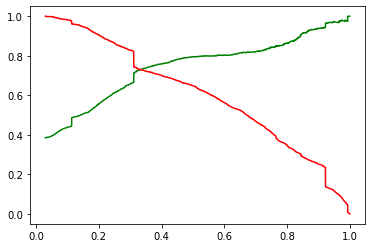

In [222]:
plt.plot(thresholds, p[:-1],'g-')
plt.plot(thresholds, r[:-1],'r-')
plt.show()

In [223]:
num_cols= X_test.select_dtypes(include=['float64','int64']).columns
X_test[num_cols]= scaler.fit_transform(X_test[num_cols])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.058621,-0.108519,0.416452,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4050,-0.293797,-1.150166,-0.888077,-1.263530,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
7201,3.403712,-0.422469,0.420993,-0.143542,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1196,-0.293797,0.305228,-0.110357,0.976446,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8219,-0.293797,1.396773,-0.433947,-0.283540,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [224]:
X_test= X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Olark Chat,Lead Source_Referral Sites,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.293797,-0.108519,0,0,0,0,0,0,0,1,0
4050,-0.293797,-0.888077,1,0,0,0,0,0,0,1,0
7201,3.403712,0.420993,0,0,1,0,0,0,0,1,0
1196,-0.293797,-0.110357,0,0,0,0,0,0,0,1,0
8219,-0.293797,-0.433947,0,0,1,0,0,0,0,1,0


In [225]:
X_test_sm= sm.add_constant(X_test)

In [226]:
X_test_sm.shape

(2731, 12)

In [227]:
y_test_pred= res.predict(X_test_sm)

In [228]:
y_test_pred[:10]

3504    0.318097
4050    0.921495
7201    0.152341
1196    0.317656
8219    0.203070
8747    0.112640
9048    0.341708
6524    0.218451
7693    0.053926
8187    0.921495
dtype: float64

In [229]:
y_pred_1= pd.DataFrame(y_test_pred)

In [230]:
y_pred_1.head()

,0
3504,0.318097
4050,0.921495
7201,0.152341
1196,0.317656
8219,0.203070


In [231]:
y_test_df= pd.DataFrame(y_test)

In [232]:
y_test_df['Prospect ID']= y_test_df.index


In [233]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace= True)

In [234]:
y_pred_final= pd.concat([y_test_df, y_pred_1], axis=1)

In [235]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.318097
1,1,4050,0.921495
2,0,7201,0.152341
3,0,1196,0.317656
4,1,8219,0.203070


In [236]:
y_pred_final= y_pred_final.rename(columns={0 : 'Converted_prob'})

In [237]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.318097
1,1,4050,0.921495
2,0,7201,0.152341
3,0,1196,0.317656
4,1,8219,0.203070


In [238]:
y_pred_final= y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map(lambda x: round(x*100))

In [239]:
y_pred_final.head()


,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.318097,32
1,4050,1,0.921495,92
2,7201,0,0.152341,15
3,1196,0,0.317656,32
4,8219,1,0.203070,20


In [240]:
y_pred_final['final_Predicted']= y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [241]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.318097,32,1
1,4050,1,0.921495,92,1
2,7201,0,0.152341,15,0
3,1196,0,0.317656,32,1
4,8219,1,0.203070,20,0


In [242]:
checking_test_df= y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    865
0    177
Name: final_Predicted, dtype: int64

In [243]:
865/float(865+177)

0.8301343570057581

In [245]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.775906261442695

In [246]:
confusion2= metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted)
confusion2

array([[1254,  435],
       [ 177,  865]], dtype=int64)

In [247]:
TP= confusion2[1,1]
TN= confusion2[0,0]
FP= confusion2[0,1]
FN= confusion2[1,0]

In [248]:
TP/float(TP+FN)

0.8301343570057581

In [249]:
TN/float(TN+FP)

0.7424511545293073

In [250]:
precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.6653846153846154

In [251]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8301343570057581